In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from env import host, user, password
from acquire import get_iris_data
import prepare
import explore

## Acquire Data

- Building out functions I will use to acquire my data and store in my acquire.py for use in my final_report notebook.

In [2]:
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    It takes in a string name of a database as an argument.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
def new_iris_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT 
                    s.species_id,
                    s.species_name,
                    m.sepal_length,
                    m.sepal_width,
                    m.petal_length,
                    m.petal_width
                FROM measurements AS m
                JOIN species AS s USING(species_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    
    return df

In [4]:
def get_iris_data():
    '''
    This function reads in iris data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('iris_df.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('iris_df.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_iris_data()
        
        # Cache data
        df.to_csv('iris_df.csv')
        
    return df

In [5]:
df = get_iris_data()

In [6]:
df.shape

(150, 6)

In [7]:
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_id    150 non-null    int64  
 1   species_name  150 non-null    object 
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   petal_length  150 non-null    float64
 5   petal_width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [9]:
def object_vals(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            print(df[col].value_counts(dropna=False))

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
species_id,150.0,2.000000,0.819232,1.0,1.0,2.00,3.0,3.0
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [11]:
def col_range(df):
    stats_df = df.describe().T
    stats_df['range'] = stats_df['max'] - stats_df['min']
    return stats_df

In [12]:
# Create a function to summarize my df

def summarize_df(df):
    print(f'This dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')
    print('------------------------')
    print(df.info())
    print('------------------------')
    print(df.head())
    print('------------------------')
    object_vals(df)
    print('------------------------')
    print(col_range(df))

In [13]:
summarize_df(df)

This dataframe has 150 rows and 6 columns.
------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_id    150 non-null    int64  
 1   species_name  150 non-null    object 
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   petal_length  150 non-null    float64
 5   petal_width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB
None
------------------------
   species_id species_name  sepal_length  sepal_width  petal_length  \
0           1       setosa           5.1          3.5           1.4   
1           1       setosa           4.9          3.0           1.4   
2           1       setosa           4.7          3.2           1.3   
3           1       setosa           4.6          3.1           1.5   
4           1       setosa           

## Prepare Data

In [14]:
# Check for Null Values; squeaky clean dataset.
df.isnull().sum()

species_id      0
species_name    0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [15]:
def num_distributions(df):
    for col in df.columns:
        if df[col].dtype != 'object':
            plt.hist(df[col])
            plt.title(f'Distribution of {col}')
            plt.show()

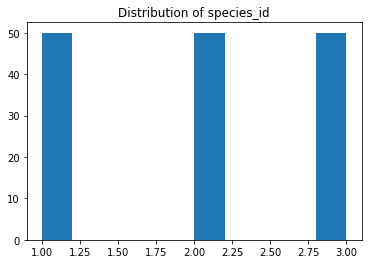

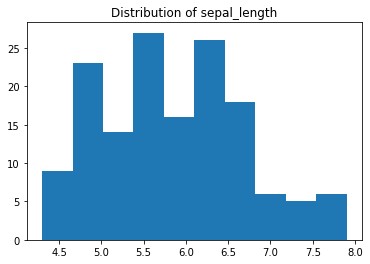

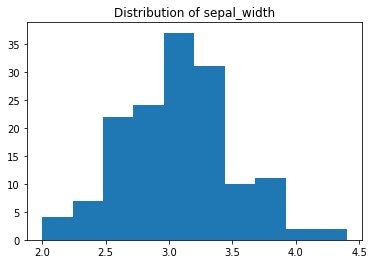

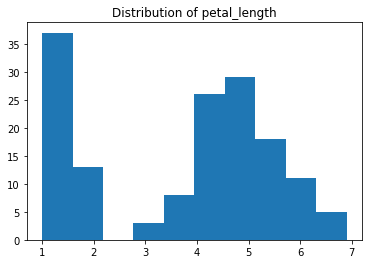

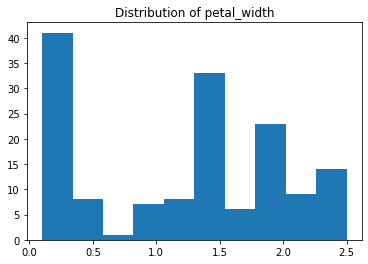

In [16]:
num_distributions(df)

In [17]:
def iris_split(df):
    '''
    This function takes in the iris data acquired by get_iris_data,
    performs a split and stratifies species column.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.species)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.species)
    return train, validate, test

In [18]:
def prep_iris(df):
    '''
    This function takes in the iris df acquired by get_iris_data,
    Drops the species_id column and renames species_name to species, 
    Performs a 3-way split stratified on species, and
    Returns train, validate, and test dataframes.
    '''
    # drop and rename columns
    df = df.drop(columns='species_id').rename(columns={'species_name': 'species'})
    
    # split dataframe into train, validate, and test
    train, validate, test = iris_split(df)
    
    return train, validate, test

In [19]:
train, validate, test = prep_iris(df)

In [20]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (84, 5)
validate -> (36, 5)
test -> (30, 5)


## Explore

In [27]:
plt.rc('font', size=14)
plt.rc('figure', figsize=(14, 10))

In [28]:
# Create melted df for viz
melted = train.melt(id_vars=['species'])

In [29]:
# Check out melted df info.
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   species   336 non-null    object 
 1   variable  336 non-null    object 
 2   value     336 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.0+ KB


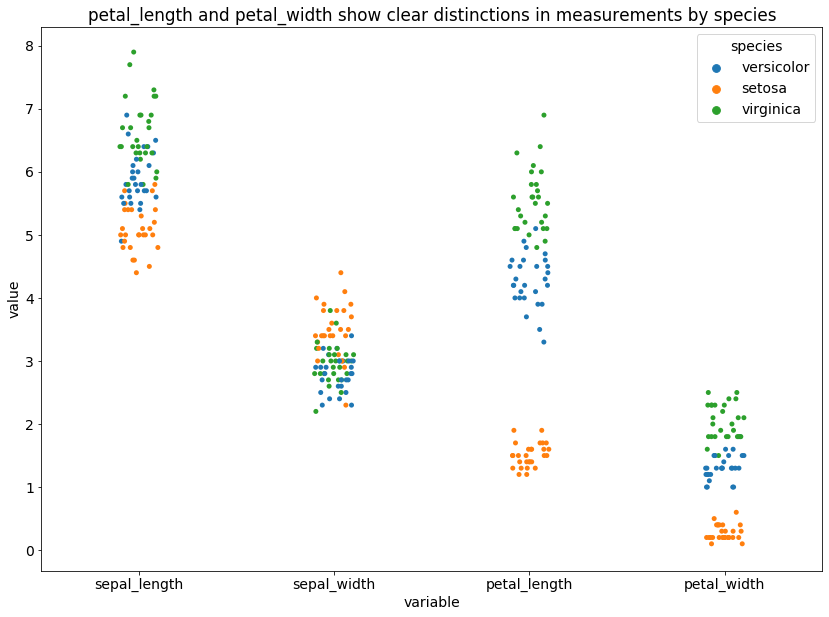

In [32]:
# Create a stripplot to examine the distribution of species throughout each continuous variable.
sns.stripplot(data=melted, x='variable', y='value', hue='species')

plt.title('petal_length and petal_width show clear distinctions in measurements by species')

plt.show()

#### Stripplot Takeaways

- Looking at the distribution of the species throughout each continuous variable, the clear distinctions between petal length and width by species lead me to believe these might be valuable features in predicting species.

In [13]:
# Feature engineering with continuous variables; can I create useful features?

train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']

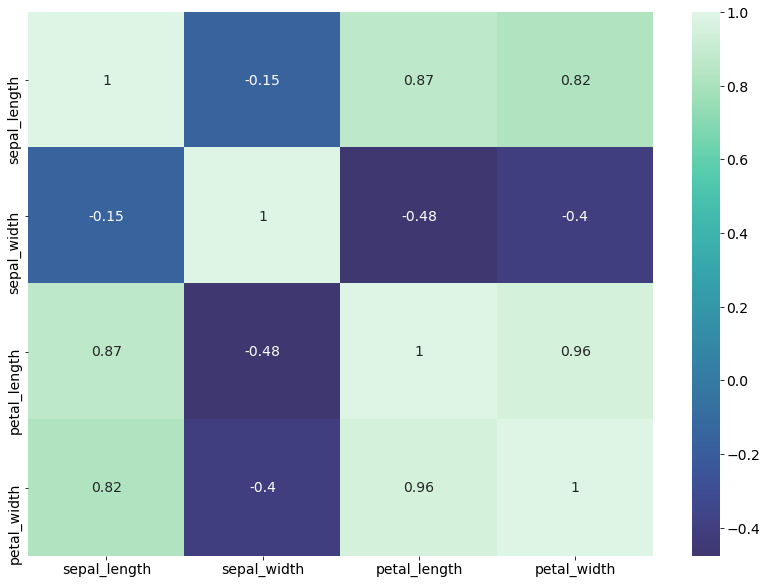

In [12]:
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)

plt.title('')
plt.show()

##### Heatmap Takeaways

- most measures correlate with each other, the least is sepal_width with sepal_lenght @ -.15.
- Negative correlations: Wider sepals -> shorter & narrower petals (smaller petal areas)
- Positive correlations: Longer sepals -> longer & wider petals (larger petal areas)
- Little to no LINEAR correlation: sepal length & sepal width.

In [33]:
#
